# **Usando Machine Learning KNN (K-Nearest Neighbors) para resolver problemas**

O objetivo principal deste artigo é demonstrar as melhores práticas de resolução de um problema por meio do algoritmo de aprendizado de máquina superado **KNN** (K-Nearest Neighbors).

Para cumprir este objetivo é utilizado o conjunto de dados **IRIS**, um conjunto de dados muito comum para cientistas de dados para testes e estudos em **ML** (Machine Learning). Além disso, este é um conjunto de dados integrado para a biblioteca ***Scikit-Learn*** ou ***Seaborn***.

> # **Conjunto de dados iris**
* Iris é um gênero de espécies de plantas com flores vistosas.
* As espécies de íris aqui estudadas, **setosa**, **versicolor** e **virginica** compartilham uma cor semelhante: violeta escuro/azul.
* Uma forma de distinguir visualmente as espécies entre elas é por meio das dimensões de suas pétalas e sépalas (comprimento e largura).

> **A primeira etapa é importar a biblioteca _Seaborn_ e, em seguida, carregar o conjunto de dados iris a partir dela.**

Diferentemente do Scikit-Learn, que carrega o dataset como arrays, o Seaborn carrega como Dataframe do Pandas, economizando algumas etapas para construir o dataframe.

In [1]:
import seaborn as sns # import library
iris = sns.load_dataset("iris")  # loads iris dataset using seaborn library

In [2]:
type(iris) #verify type of iris object

pandas.core.frame.DataFrame

O método **sample** de um Dataframe do Pandas é uma ótima maneira de visualizar como os dados são armazenados, tais como recursos e tipos de dados, a partir de amostras aleatórias do Dataframe, não ordenadas.

In [4]:
iris.sample(5) # random samples

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,versicolor
88,5.6,3.0,4.1,1.3,versicolor
122,7.7,2.8,6.7,2.0,virginica
127,6.1,3.0,4.9,1.8,virginica
56,6.3,3.3,4.7,1.6,versicolor
91,6.1,3.0,4.6,1.4,versicolor
126,6.2,2.8,4.8,1.8,virginica
3,4.6,3.1,1.5,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
113,5.7,2.5,5.0,2.0,virginica


Existem 4 características (atributos) listadas: "comprimento da sépala (cm)", "largura da sépala (cm)", "comprimento da pétala (cm)" e "largura da pétala (cm)", respectivamente.

Para entender melhor o conjunto de dados, observe a imagem abaixo.
> **Este método é específico para o Colab importar arquivos, neste caso uma imagem.**

In [7]:
from google.colab import files # import
iris_image = files.upload() # file upload for colab.research.google.com

In [ ]:
from IPython.display import Image # import
Image(filename ="iris-data-set.png", width=500, height=350) # display an image file named "iris-data-set.png" with a specified width of 500 pixels and a height of 350 pixels

> **Para realizar algumas verificações extras no Dataframe, precisamos importar a biblioteca Pandas.**

Antes de iniciar qualquer trabalho mais aprofundado sobre qualquer dataset, é essencial fazer uma análise preliminar dos dados: os tipos de dados, os seus tamanhos, alguns valores estatísticos, valores faltantes, etc. Em seguida, tire suas primeiras conclusões e corrija qualquer problema* da maneira adequada.

*não é o deste dataset, mas as verificações devem ser realizadas de qualquer maneira.

In [8]:
import pandas as pd # import

In [9]:
pd.value_counts(iris.species) # it displays the frequency count of each unique value in the "species" column of the iris dataset

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

O dataset é composto de 150 flores (exemplos), 50 de cada espécie (classe).

> **As características estatísticas básicas das colunas numéricas.**

Por meio do método **describe**, é possível visualizar a média, o desvio padrão, máximo e mínimo, e os percentis para cada um dos recursos.

In [ ]:
iris.describe() #  generate a statistical summary of the Iris dataset  for each numeric column in the dataset.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Está bem claro que cada atributo contrasta com os outros. Porém, neste caso, todos os cálculos consideram os exemplos das 3 classes juntos. A utilização de gráficos seria mais adequada para uma análise exploratória.

O método **info** fornece informações extras sobre o dataframe e o tipo de dados para cada coluna:
* os atributos são do tipo float64
* o alvo, classe ou espécie, do tipo objeto

In [ ]:
iris.info() # it displays a concise summary of the Iris dataset, including information about the DataFrame's structure, column data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


O método **isnull** combinado com o método **sum** retorna se há algum valor nulo no dataframe que deva ser gerenciado, caso contrário, pode implicar na impossibilidade de aplicar qualquer algoritmo de aprendizado de máquina.

Ao examinar a saída, você pode avaliar rapidamente quais colunas têm valores ausentes e determinar a extensão da ausência de dados no conjunto de dados. Essas informações são cruciais para tomar decisões sobre como lidar com dados ausentes, como imputação ou exclusão de linhas/colunas afetadas.

In [ ]:
iris.isnull().sum() # you can obtain the count of missing values for each column. This is particularly useful in data preprocessing and quality assurance, as it helps identify any missing or incomplete data points.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

> # **Análise Exploratória por Gráficos**

**Seaborn** é uma biblioteca de visualização de dados Python baseada em **Matplotlib**. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.


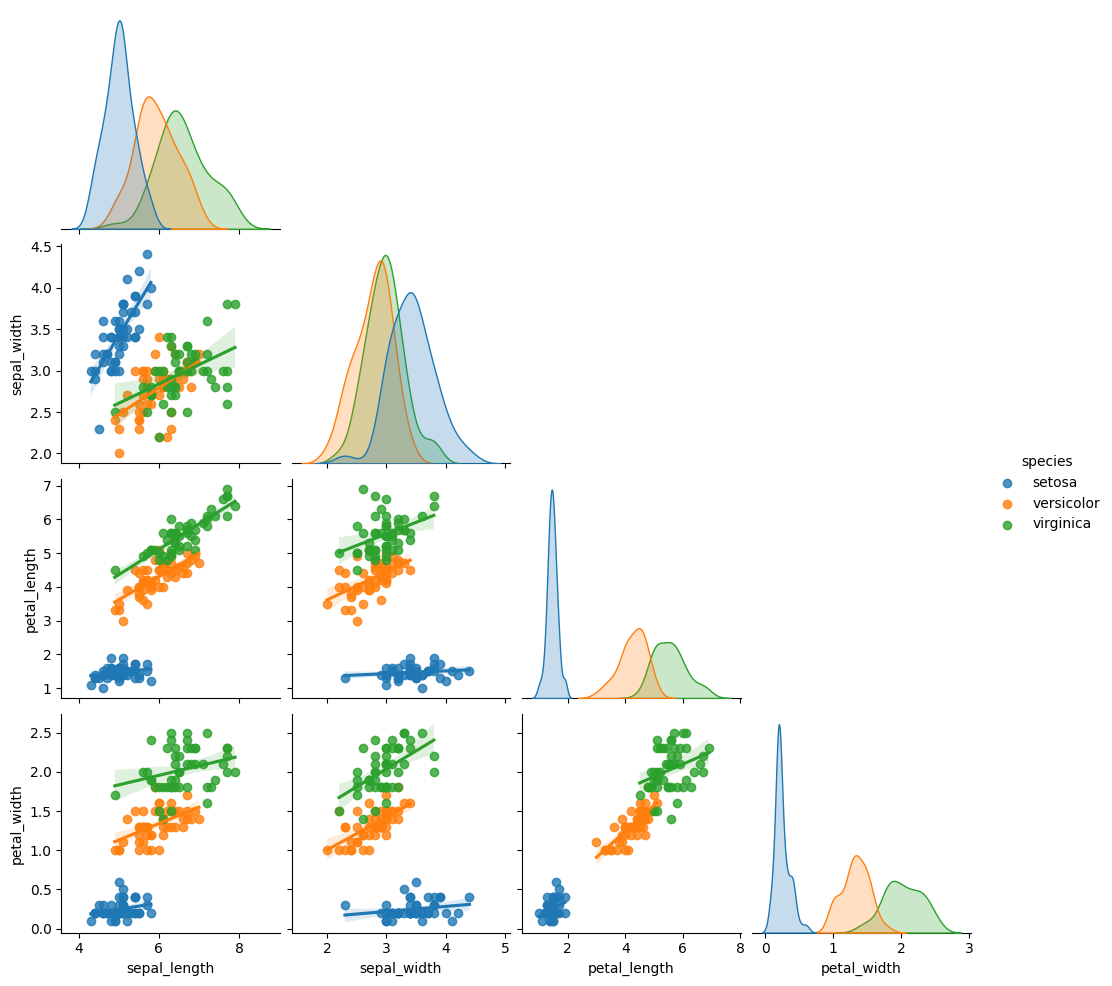

In [10]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

# is used to create a pairwise scatter plot matrix
# corner=True argument configures the plot to only display the lower triangle of the pairwise matrix
# kind='reg' argument adds linear regression lines to the scatter plots, providing a visual indication of the linear relationship between variables.


> ## **Identificação Setosa**

**Iris-setosa**, **iris-virginica** e **iris-versicolor** têm a mesma cor (violeta/azul). Uma forma de distinguir as espécies é analisando suas dimensões de pétalas e sépalas e as proporções destas. Juntamente com uma análise exploratória dos dados é possível obter informações valiosas e algumas conclusões. Segue.

Como visto nos gráficos acima, os dados de **iris-setosa** são bem distintos das outras duas espécies. Com uma distribuição de dados como essa, espera-se de qualquer bom algoritmo preditivo de aprendizado de máquina uma alta acurácia, talvez 100%. Ou melhor, para a classificação desta espécie em relação às outras duas, **basta verificar as dimensões das pétalas**; se seu comprimento for de até 2 cm ou sua largura for de até 0,7 cm, com certeza é íris-setosa.


In [ ]:
print('Para a flor Setosa, valor máximo de comprimento da pétala nesse dataset é', iris.loc[iris.species=='setosa'].max().petal_length, 'cm, enquanto que para as outras espécies o valor mínimo é', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length, 'cm.\nQuanto à largura da pétala, o valor máximo para a Setosa é', iris.loc[iris.species=='setosa'].max().petal_width, 'cm, e para as outras espécies o valor mínimo é', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width, 'cm.')

# iris.loc[iris.species=='setosa'].max().petal_length: This code snippet filters the Iris dataset to select only the rows where the species is Setosa (iris.species=='setosa'). Then, it calculates the maximum value of the petal length column using .max(). Finally, .petal_length extracts the maximum petal length value.

# iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length: This code snippet filters the dataset to select rows where the species is either Virginica or Versicolor ((iris.species=='virginica') | (iris.species=='versicolor')). Then, it calculates the minimum value of the petal length column using .min(). Finally, .petal_length extracts the minimum petal length value.

# iris.loc[iris.species=='setosa'].max().petal_width: This line filters the dataset to select only the rows where the species is Setosa (iris.species=='setosa').
#It then calculates the maximum value of the petal width column using .max().
#Finally, .petal_width extracts the maximum petal width value.


# iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width: This line filters the dataset to select rows where the species is either Virginica or Versicolor ((iris.species=='virginica') | (iris.species=='versicolor')). It then calculates the minimum value of the petal width column using .min(). Finally, .petal_width extracts the minimum petal width value.

Para a flor Setosa, valor máximo de comprimento da pétala nesse dataset é 1.9 cm, enquanto que para as outras espécies o valor mínimo é 3.0 cm.
Quanto à largura da pétala, o valor máximo para a Setosa é 0.6 cm, e para as outras espécies o valor mínimo é 1.0 cm.


In [ ]:
from IPython.display import display #  imports the display function from the IPython.display module
p_l = pd.pivot_table(iris, values=['petal_length'], index=['species'],aggfunc=[min,max], margins=False) #  creates a pivot table p_l using the pd.pivot_table() function from the pandas library. The pivot table is constructed from the iris DataFrame and calculates the minimum and maximum values of the petal_length column for each unique species. The index=['species'] argument specifies that the species column should be used as the index for the pivot table. The margins=False argument excludes the row and column totals.
p_w = pd.pivot_table(iris, values=['petal_width'], index=['species'],aggfunc=[min,max], margins=False) # This line creates another pivot table p_w using the pd.pivot_table() function.
P_L = pd.DataFrame(p_l.to_records())  # converts the pivot table p_l to a DataFrame P_L using the pd.DataFrame() function. The to_records() method is applied to the pivot table to convert it into a record array
P_W = pd.DataFrame(p_w.to_records())
display(P_L),display(P_W) # it displays the DataFrames P_L and P_W using the display() function. The display() function is called twice, once for each DataFrame, to show them as output.


,species,"('min', 'petal_length')","('max', 'petal_length')"
0,setosa,1.0,1.9
1,versicolor,3.0,5.1
2,virginica,4.5,6.9


,species,"('min', 'petal_width')","('max', 'petal_width')"
0,setosa,0.1,0.6
1,versicolor,1.0,1.8
2,virginica,1.4,2.5


(None, None)

> ## **Identificação de Virgínia e Versicolor**

Para as outras duas espécies. Os dados de **iris-versicolor** e **iris-virginica**, ao mesmo tempo que são próximos, é notório um claro valor normal para todas as suas dimensões, exceto para a largura da sépala que é quase a mesma para ambas as espécies. Devido a isso, é possível distinguir com uma alta porcentagem de precisão quando se refere às seguintes relações:

* Comprimento da pétala **vs** Comprimento da sépala ou largura da sépala
* Largura da pétala **vs** Largura da sépala ou Largura da sépala ou Comprimento da pétala

A única relação que é quase a mesma, e não poderia, por meio de uma análise exploratória, distinguir as duas espécies, já que as dimensões e a proporção entre comprimento e largura são praticamente as mesmas é:

* Comprimento da Sépala **vs** Largura da Sépala

Um algoritmo de Machine Learning é de grande utilidade para essa classificação, reduzindo qualquer erro humano ao comparar todas essas dimensões e relacionamentos.



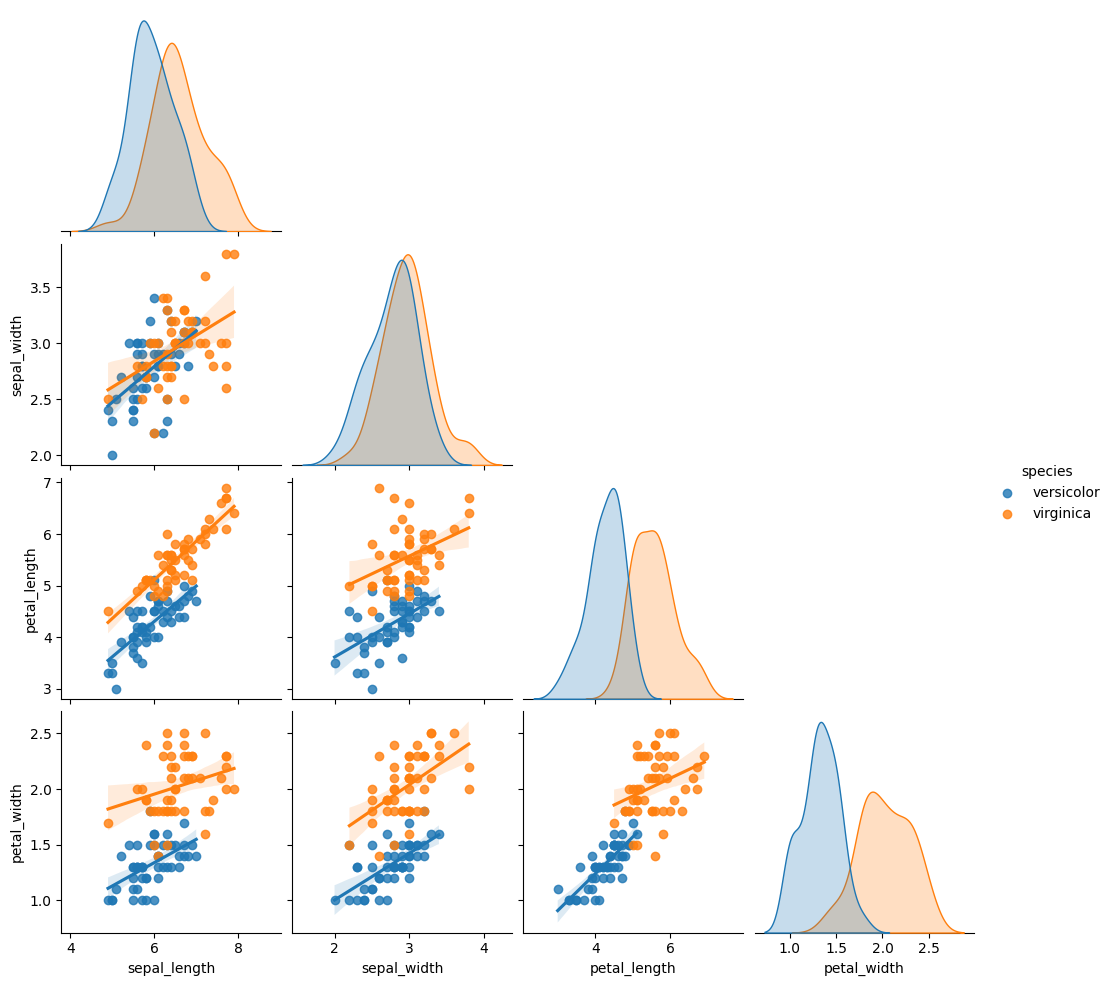

In [ ]:
sns.pairplot(iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')], hue="species", corner=True, kind='reg')

# This line creates a pairwise scatter plot matrix using the Seaborn library's pairplot() function.
# It visualizes the relationships between variables for the subset of the Iris dataset that includes only the Virginica and Versicolor species.

# iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')]: This code filters the iris DataFrame to select only the rows where the species is either Virginica or Versicolor. This subset of the data will be used for plotting.

# hue="species": The hue parameter is set to "species" to differentiate the data points based on the species column. This allows for visualizing the two species with different colors on the scatter plot.

# corner=True: The corner parameter is set to True to display only the lower triangle of the pairwise matrix. This configuration helps in visual clarity and avoids duplicate plots.

# kind='reg': The kind parameter is set to 'reg' to include regression lines on the scatter plots. These lines provide a visual representation of the linear relationship between variables, helping to identify any potential trends or correlations.

É notório que é possível identificar a espécie da maioria das flores, mas é desafiador para algumas delas. Por que não utilizar um algoritmo de ML para ajudar nesta tarefa?


# **APRENDIZADO DE MÁQUINA - Análise Preditiva**

Agora, a análise preditiva será realizada não por uma pessoa em si, mas com o auxílio de algoritmos de **aprendizado de máquina**. Mais especificamente, o problema será resolvido com o uso do algoritmo **KNN**. As melhores práticas serão realizadas e explicadas.

Utilizaremos a biblioteca scikit-learn, uma biblioteca de aprendizado de máquina de código aberto que suporta aprendizado supervisionado e não supervisionado. Ela também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, seleção e avaliação de modelo e muitos outros utilitários.

> # **Dados de TREINO e TESTE**

O primeiro passo para realizar uma análise preditiva por meio de um algoritmo de Machine Learning é separar os dados em duas partes. Um a ser **treinado**, então os coeficientes são calculados para o melhor ajuste a esses dados, de acordo com o algoritmo escolhido. A segunda parte é reservada para ser **testada**, assim é possível avaliar a capacidade de generalização do modelo, ou seja, ***avaliar a sua precisão*** para classificar exemplos ainda não vistos.

> A escolha de quais partes dos dados serão usadas como treino e teste é muito importante. Vamos usar **70% como treino** e **30% como teste**.

> ***Scikit-learn*** tem um método muito bom para isso, **train_test_split**; no entanto, toda vez que você executa esse método, ele retorna amostras diferentes, pois o torna aleatório, o que tornaria o mesmo problema impossível de ser replicado. A seleção dos dados pode produzir resultados ligeiramente diferentes para o algoritmo.**

> ***Pandas*** tem uma solução para isso, uma uma divisão aleatória semeada do banco de dados. O método **sample** definido com **random_state=500** o tornaria replicável. Para enxergarem a diferença, executem testes com valores diferentes para random_state e *train_test_split*.

> O resultado final é:

>>* **X_train** e **y_train** **-** para treinamento, dados e alvo, respectivamente
>>* **X_test** **-** dados para prever com o algoritmo
>>* **y_test** **-** alvo para validação do modelo

In [14]:
train = iris.sample(frac=0.7, random_state=500)
#creates a new DataFrame called train by sampling 70% of the rows from the original iris DataFrame.
# random state is a seed value parameter is set to 500, which is a seed value for the random number generator. This ensures that the same rows are selected each time the code is executed, providing reproducibility.

In [15]:
test = iris.drop(train.index) # The line test = iris.drop(train.index) creates a new DataFrame called test by removing the rows that are present in the train DataFrame from the original iris DataFrame.
# By passing train.index as the index values to drop, it removes the rows that have the same indices as those in the train DataFrame.

In [16]:
X_train = train.drop(labels='species', axis=1) # it removes the 'species' column from the train DataFrame.

In [17]:
y_train = train.species #  it selects the 'species' column from the train DataFrame and contains targets values to the training data. Since 'species' is a column name in the DataFrame, this expression extracts the values from that column.

In [18]:
X_test = test.drop(labels='species', axis=1) # it uses the drop() function on the test DataFrame to exclude the specified column. The labels='species' argument indicates that the 'species' column should be dropped. The axis=1 parameter specifies that the column should be dropped along the columns (axis 1) rather than the rows (axis 0).

In [19]:
y_test = test.species # this code selects the 'species' column from the test DataFrame. It retrieves the values from that column.

> **o método train_test_split também possui um método de divisão aleatória semeado, mas não o mesmo, portanto, a mesma semente representa dados diferentes do método de amostra do Pandas.

> Segue a opção de usar o train_test_split: simples, código de uma linha:

>>>**from** sklearn.model_selection **import** train_test_split

>>>X_train,  X_test,  y_train,  y_test = train_test_split ( iris.drop ( 'species' ,axis = 1 ) , iris [ 'species' ] , test_size = 0.3, random_state = 1 )

> A seguir, é apresentada uma amostra das primeiras 5 linhas dos dados do treino.

* Toda vez que o método *train_test_split* é executado, uma *amostra diferente* para teste e treinamento é selecionada, pois trabalha aleatoriamente com os dados. Assim, toda vez que você tiver dados de treino diferentes, o desempenho pode ser diferente. Para minimizar esse problema, são propostas diferentes técnicas (protocolos) para dividir os dados em treinamento/teste; uma das mais conhecidas é a chamada de **validação cruzada**, que será utilizada mais adiante.





In [21]:
print(X_train.head(),"\n", y_train.head())

# X_train.head(): This code retrieves the first few rows (by default, the first five rows) of the X_train DataFrame. The head() function is used to display the top portion of the DataFrame.
# y_train.head(): This code retrieves the first few rows of the y_train Series. Similarly, the head() function is applied to display the initial rows of the Series.

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


> A seguir, as dimensões dos dados após a divisão.

In [ ]:
X_train.shape,X_test.shape # prints the shapes of the X_train and X_test DataFrames.This information helps to understand the size or dimensions of the datasets, which can be important for various purposes such as data preprocessing, model fitting, or performing operations specific to the dataset's structure.

((105, 4), (45, 4))

105 linhas e 4 colunas para o treino; 45 linhas (30%) e 4 colunas para o teste.

In [ ]:
y_train.shape,y_test.shape

((105,), (45,))

105 e 45 linhas para treino e teste, respectivamente.

# **KNN - K Nearest Neighbors (Vizinhos mais próximos)***

No reconhecimento de padrões, o algoritmo k-vizinhos mais próximos (k-NN) é um método não paramétrico usado para classificação e regressão.

> Na classificação k-NN, a saída é a atribuição de uma classe. Ao objeto atribuída a classe mais frequente dentre seus k vizinhos mais próximos (k é um inteiro positivo, geralmente pequeno). Se k = 1, então é atribuída ao objeto a classe do vizinho mais próximo.


> ## **Instanciando o Algoritmo KNN**

O Classificador KNN (KNeighborsClassifier) é importado do Scikit-learn.

O **KNeighborsClassifier** possui alguns parâmetros a serem ajustados para melhorar seu desempenho. A princípio, apenas o valor de k (n_neighbors) deve ser definido, enquanto os outros possuem valores definidos como padrão. Posteriormente, pode-se aplicar alguma técnica de ajuste de parâmetros.


In [22]:
from sklearn.neighbors import KNeighborsClassifier # import

In [23]:
knn = KNeighborsClassifier(n_neighbors=3) # it creates a new instance of the K-nearest neighbors (KNN) classifier with n_neighbors set to 3.

k (n_neighbors) é configurado com o valor 3

> ## **Treinando o algoritmo KNN**

Nesta etapa o modelo é "treinado". Coloquei entre aspas porque, como sabemos, o kNN não cria uma representação simplificada do conhecimento adquirido. Ele  utiliza o conjunto de dados completo para calcular as distâncias e realizar as previsões.

**Fit** é o método "padrão" utilizado pelo Scikit-Learn para ajustar um classificador aos dados.

In [24]:
knn.fit(X_train,y_train) #trains the K-nearest neighbors (KNN) classifier. The classifier learns from this training data to make predictions.

KNeighborsClassifier(n_neighbors=3)

Antes de visualizar as previsões, é possível estimar a acurácia média para um dado conjunto de dados (teste)  e seus respectivos rótulos.

In [25]:
knn.score(X_test,y_test)#evaluates the accuracy of the trained KNN classifier on the test data (X_test and y_test) using the score() method. It calculates and returns the classification accuracy, which is the percentage of correctly classified instances in the test data.

0.9555555555555556

> ## **Fazendo previsões com o KNN**

Após a instanciação do KNN, é possível obter os primeiros resultados de previsào para os dados de teste (X_test).

**Predict** é o método para inferir resultados de quaisquer dados compatíveis com os de treino.

In [26]:
results = knn.predict(X_test) # This line applies the trained KNN classifier (knn) to the test data (X_test) and generates predictions for the target variable.
#print(results)
#print(y_test)

Esta é a lista das classes (espécies) previstas para os 45 exemplos do conjunto de teste **X_test**. As previsões devem ser comparadas com os valores reais, representados por **y_test**.

># **Validação**

Técnicas para calcular e melhorar a acurácia e outras métricas de desempenho.

> ## **Matriz de Confusão**

A **Matriz de Confusão** é um método utilizado para verificar como os exemplos de cada classe foram classificados. A partir dela, várias métricas podem ser calculadas, como acurácia, **recall** e **precision**.

In [ ]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Previsto'], margins=True, margins_name='total')) # This line creates a cross-tabulation or contingency table between the true labels (y_test) and the predicted labels (results) using the crosstab() function from the pandas library. It provides a summary of how the predicted labels compare to the actual labels in a tabular format, including row and column names for clarity.

Previsto    setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


A matriz de confusão acima representa os resultados do obtios pelo KNN para a previsão do conjunto de teste.

Para entender melhor a definição de *recall* e *precision*, vamos avaliar os **resultados da classe VIRGINICA**:

* A classe está claramente identificada, pois todas elas foram classificadas corretamente. Isso representa um **recall** de 100%.

* Por outro lado, não se pode dizer que o modelo foi preciso, 100% de **precision**, pois das 13 virginicas preditas, duas delas eram de fato versicolor.

A seguir, essas métricas são calculadas.

> ## **Métricas de Classificação**

A tabela abaixo apresenta as medidas de **precision** e **recall** para cada classe, calculadas com a utilização do módulo **metrics**.

A métrica **f1-score** representa uma média ponderada entre essas duas métricas. Essa é uma ótima métrica por não levar em consideração os verdadeiros negativos que geralmente são irrelevantes para os resultados.

A acuráca mostra o desempenho do algoritmo de forma geral.

In [27]:
from sklearn import metrics

In [28]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3)) # prints a classification report using the classification_report() function from the scikit-learn library's metrics module. The report includes various evaluation metrics such as precision, recall, F1-score, and support for each class. The target_names argument specifies the unique species names from the iris dataset as the class names, and digits=3 sets the number of decimal places for the reported metrics to three.

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



A acurácia é a mesma apresentada anteriormente pelo método 'score' do KNN, 95,6%.

> ## **Validação Cruzada (Cross Validation)**

Conforme discutido anteriormente, a seleção de dados a serem usados para essas duas partes importantes do aprendizado de máquina supervisionado pode alterar a eficiência do modelo. Em outras palavras, diferentes dados treino podem resultar em diferentes modelos, com diferentes previsões e, consequentemente, diferentes métricas de desempenho.

Isso apenas considerando a seleção dos exemplos que fazem parte do treino e teste, mantendo fixo todos os parâmetros do algoritmo.

Para minimizar esse problema, uma boa solução é usar a **Validação Cruzada**, que divide os dados de treinamento em **n** partições (*folds*) (neste exemplo, n = 5) e repete as etapas de **treino** e **teste** **n** vezes, usando uma dessas partições (folds) como **teste** em cada uma das vezes.

No final, é calculada a média das **n** rodadas para cada métrica.



In [29]:
from sklearn.model_selection import cross_val_score

Como visto anteriormente, o desempenho do classificador depende de quais exemplos fazem parte dos conjuntos de treino e teste. Para a seleção realizada com *random_state=500*, a acurácia é de 95,6%.

In [ ]:
var = "%", print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

In [33]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')

# This code invokes the cross_val_score() function from the scikit-learn library, which facilitates cross-validation.
# It evaluates the performance of a model by splitting the dataset into multiple folds and performing training and testing on different subsets of the data.

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

Com a validação cruzada, o desempenho varia entre 93% e 100%.

O desempenho do classificador é considerado como a média da validação cruzada. Neste caso, 96,7% +/- 2,1%.

In [ ]:
var = "%", print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),var[0],"(+/- %0.1f)" % (scores.std() * 100), var[0])

# prints the mean and standard deviation of the accuracy scores obtained from cross-validation.

Accuracy for Cross Validation: 96.7 % (+/- 2.1) %


Se você testar outros parâmetros para o classificador, esta é uma métrica de desempenho muito melhor, pois reduz a influência de uma seleção específica dos dados de treino e teste no desempenho do classificador.


># **Otimizando o valor de k (n_neighbors)**

> ## **Definindo um lista de valores para k**

É possível utilizar **GridSearch** para otimização de parâmetros de um classificador.


Inicialmente, o **parâmetro k** do KNN foi configurado com o valor igual a 3.

Agora, esse parâmetro será "otimizado". Para isso, utilizaremos uma lista com os valores de k a serem testados, variando de 1 a 30.

In [34]:
k_list = list(range(1,31))

In [36]:
k_values = dict(n_neighbors=k_list) # dictionary has the key 'n_neighbors' mapped to the values in k_list.
print(k_values.keys()), # This code retrieves the keys of the k_values dictionary. The keys() method returns a list-like object containing the keys.
print(k_values.values()) # This code retrieves the values of the k_values dictionary.

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


> ## **Instanciando o objeto GridSearch**

**GridSearch** realiza uma busca exaustiva sobre uma lista de valores previamente especificados para um estimador.

Internamente, são executados os métodos **fit** e **predict**, juntamente com a estratégia de **validação cruzada (cross-validation)**.

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy') # it creates a grid search object (grid) using the GridSearchCV class from scikit-learn. It takes the KNN classifier (knn), the dictionary of parameter values (k_values), and other parameters such as the number of cross-validation folds (cv=5) and the scoring metric (scoring='accuracy').

> ## **Executando GridSearch**

In [39]:
grid.fit(iris.drop('species', axis=1), iris.species) # This line performs the grid search by fitting the grid search object (grid) to the feature data (iris.drop('species', axis=1)) and the target labels (iris.species) from the iris dataset.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

> ## **Vizualizando os resultados**

Vamos checar o desempenho do classificador utilizando todos os parâmetros testados pelo GridSearch.

In [41]:
grid.cv_results_ # It provides information about the performance of different parameter combinations during cross-validation.
grid_table = pd.DataFrame(grid.cv_results_) # it creates a DataFrame (grid_table) from the cv_results_ attribute of the grid search object.
grid_table.head() # prints the first few rows of the grid_table DataFrame, giving a glimpse of the grid search results.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002318,0.000425,0.003175,0.000225,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.002081,0.000112,0.003178,0.000133,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.002207,0.000031,0.003189,0.000052,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.002130,0.000098,0.003076,0.000079,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.003535,0.002741,0.003451,0.000661,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


O método *cv_results_* apresenta diversas métricas obtidas pelo classificador kNN com diferentes valores de k.

In [42]:
for key in grid.cv_results_.keys(): #  It displays the available information or metrics recorded during the grid search.
  print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [46]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

# creates a new DataFrame (grid_table_rank) that includes only the relevant columns ('params', 'mean_test_score', 'std_test_score', 'rank_test_score') from the grid_table. It filters the rows where the 'rank_test_score' is equal to 1, indicating the best-performing parameter combination, and sorts the results by 'std_test_score' in ascending order.

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


> A melhor acurácia com o menor valor de k é apresentado a seguir.

In [44]:
print("O melhor valor de k = {} com {} of accuracy.".format(grid.best_params_,grid.best_score_))

O melhor valor de k = {'n_neighbors': 6} com 0.9800000000000001 of accuracy.


> Ele também apresenta o menor desvio padrão dentre os ranqueados em 1o lugar.

> O ranking depende somente da acurácia, conforme configurado na instanciação do GridSearch.

In [45]:
print("O melhor valor de k, rank {}, com k = {}, maior acurácia média obtida com validação cruzada = {} e menor desvio padrão = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

O melhor valor de k, rank 1, com k = {'n_neighbors': 6}, maior acurácia média obtida com validação cruzada = 0.9800000000000001 e menor desvio padrão = 0.016329931618554516


> A seguir, o melhor **classificador** com sua configuração.

In [ ]:
print("O melhor classificador é: {}".format(grid.best_estimator_))

O melhor classificador é: KNeighborsClassifier(n_neighbors=6)


> ## **Gráficos**

A seguir, um gráfico apresentando a variação da acurácia para os diferentes valores de k.

In [ ]:
import matplotlib.pyplot as plt

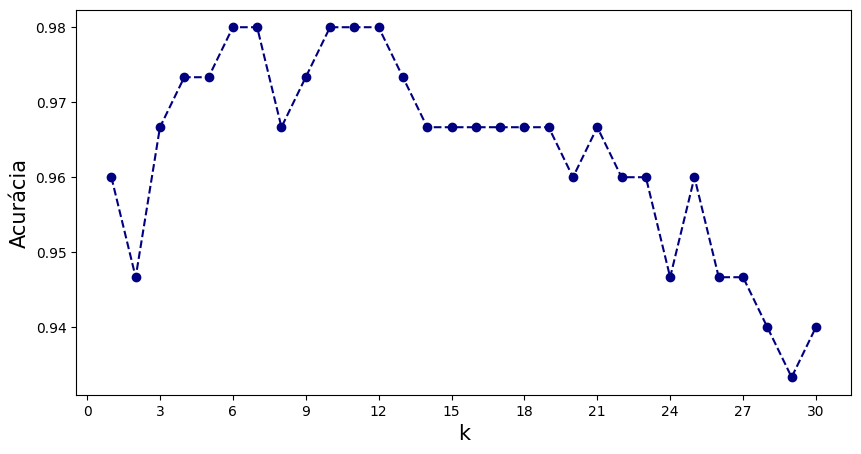

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('k', fontdict={'fontsize': 15})
plt.ylabel('Acurácia', fontdict={'fontsize': 15})
#plt.title('Acurácia para diferentes valores de k', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

# **Conclusões**

Outros parâmetros poderiam ter sido ajustados com o **GridSearch**. No entanto, como o conjunto de dados Iris é muito simples, provavelmente não faria muita diferença.

Durante o curso, teremos oportunidade de utilizar outros conjuntos de dados e ajustar parâmetros de outros algoritmos de aprendizado de máquina.

# **Agradecimentos**

Esta aula utilizou parte do conteúdo disponibilizado em:

https://colab.research.google.com/github/teliofm/Minerando/blob/master/Scikit_Learn_KNN_Best_Practices.ipynb
